In [2]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Image Classification with CNN

### Loading the Database

In [276]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

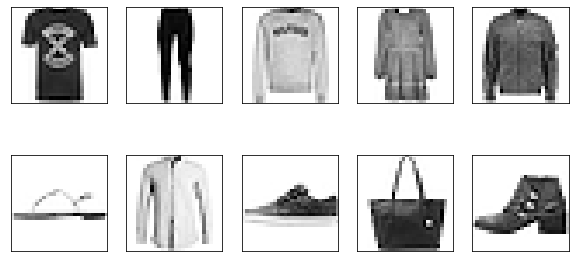

In [228]:
plt.figure(figsize=(10,5))
for i in range(10):
    labels = np.where(train_labels==i)[0]
    choice = np.random.choice(labels)
    pic = im.fromarray(train_images[choice])
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pic, cmap='Greys')
plt.show()

In [277]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels,
                                                                                    train_size=0.8, random_state=2)

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

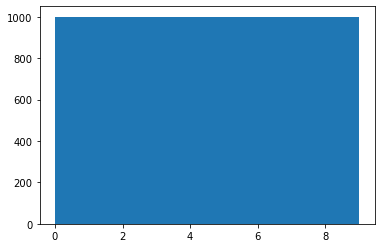

In [257]:
plt.hist(test_labels)

(array([1207., 1191., 1204., 1233., 1204., 1145., 1188., 1243., 1197.,
        1188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

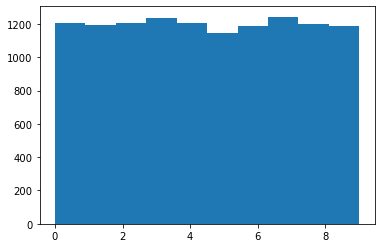

In [278]:
plt.hist(validation_labels)

### Model Development

In [303]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
of_callback = tf.keras.callbacks.EarlyStopping(
                                            monitor='val_accuracy', 
                                            verbose=1,
                                            patience=1,
                                            mode='max',
                                            restore_best_weights=True)
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(validation_images, validation_labels),
                    callbacks=of_callback)

Epoch 1/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.5418 - accuracy: 0.8204 - val_loss: 0.3785 - val_accuracy: 0.8624
Epoch 2/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3451 - accuracy: 0.8733 - val_loss: 0.3353 - val_accuracy: 0.8796
Epoch 3/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3007 - accuracy: 0.8893 - val_loss: 0.3235 - val_accuracy: 0.8845
Epoch 4/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2752 - accuracy: 0.8980 - val_loss: 0.2966 - val_accuracy: 0.8932
Epoch 5/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2530 - accuracy: 0.9059 - val_loss: 0.2923 - val_accuracy: 0.8931
Epoch 5: early stopping


375/375 - 2s - loss: 0.2966 - accuracy: 0.8932 - 2s/epoch - 5ms/step


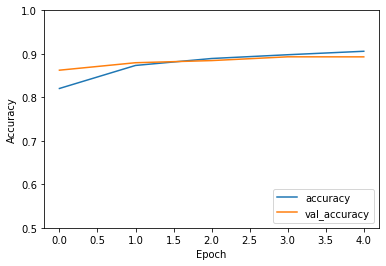

In [304]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

val_loss, val_acc = model.evaluate(validation_images,  validation_labels, verbose=2)

### Model Validation

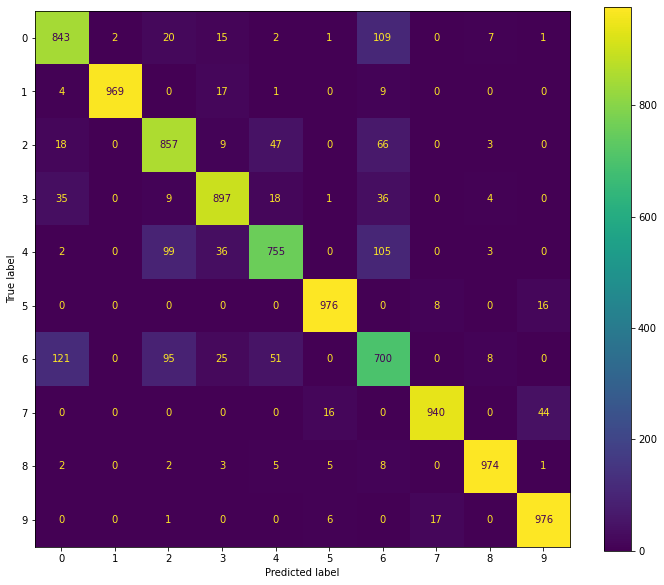

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.79      0.86      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.86      0.76      0.80      1000
           5       0.97      0.98      0.97      1000
           6       0.68      0.70      0.69      1000
           7       0.97      0.94      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [317]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Make predictions
y_probs = model.predict(test_images)

#Convert prediction probabilities into integers
y_pred = y_probs.argmax(axis=1)

# creating and plotting the confusion matrix
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=np.arange(0, 10, 1))
disp.plot()
plt.show()

# creating classification report
print(classification_report(test_labels, y_pred))

In [405]:
pic_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]*2
i = 0
j = 0
pics = np.zeros((20, 28, 28))
true_labels = np.zeros(20)
pred_labels = np.zeros(20)
while len(pic_list) != 0:
    index = np.where(y_pred != test_labels)[0][i]
    true_label = test_labels[index]
    pred_label = y_pred[index]
    i += 1
    if true_label in pic_list:
        pics[j] = test_images[index]
        true_labels[j] = true_label
        pred_labels[j] = pred_label
        pic_list.remove(true_label)
        j += 1

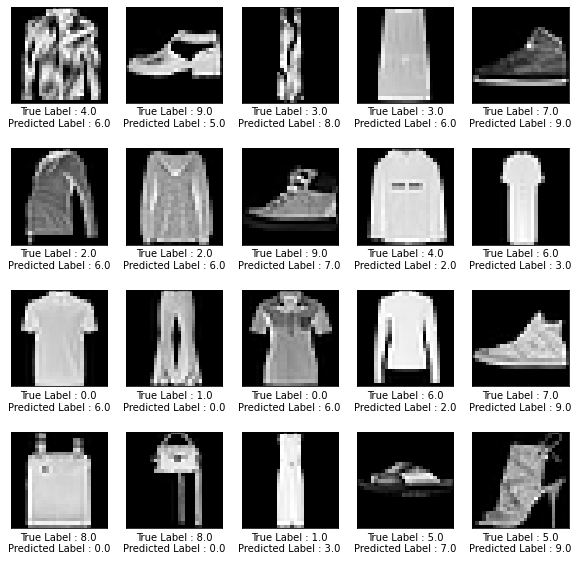

In [408]:
plt.figure(figsize=(10,10))
for i in range(20):
    pic = im.fromarray(pics[i])
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(f'True Label : {true_labels[i]}\nPredicted Label : {pred_labels[i]}')
    plt.imshow(pic, cmap='Greys')
plt.show()